# Introduction
Perceptron is a simple learning model for solving the binary classification problem. Let us take a look at the binary classification problem again:
* Input space: $ {X} = \mathbb{R}^d $
* Output space: $ {Y} = \{+1, -1\} $
* Problem statement: Given an input vector $ {x} \in \mathbb{R}^d $, we need to output a corresponding binary decision (yes/no). Several examples are:
    * Credit card approval: the bank consultant decides whether to approve a credit card application based on the client's input information.
    * Spam messages detection: a detector needs to classify between spam and non-spam messages, based on their contents.

# Implementation

We import the necessary modules

In [2]:
import random
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [103]:
def sign(val):
    if abs(val) < 0.000000001:
        return 0
    if val > 0:
        return 1
    return -1

In [36]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def asVector(self):
        return [self.x, self.y]
    
    @staticmethod
    def random():
        return Point(random.uniform(-1, 1), random.uniform(-1, 1))

In [124]:
class Line:
    def __init__(self, a, b, c):
        # ax + by + c = 0
        self.a = a
        self.b = b
        self.c = c
    
    def getPointAtX(self, x):
        if self.b == 0:
            return Point(x, -1)
        return Point(x, (-self.a*x - self.c) / self.b)
    
    def evaluatePoint(self, point):
        return sign(self.a*point.x + self.b*point.y + self.c)
    
    @staticmethod
    def random():
        p1 = Point.random()
        p2 = Point.random()
        
#         p1 = Point(-1, -1)
#         p2 = Point(1, 1)
        
        u = [-(p2.y - p1.y), p2.x - p1.x]
        return Line(u[0], u[1], -u[0]*p1.x - u[1]*p1.y)

In [121]:
class Perceptron:
    def __init__(self, dimensions):
        self.dimensions = dimensions
        self.weights = [0 for _ in range(dimensions + 1)]
    
    def evaluate(self, inputs):
        if (len(inputs) != self.dimensions):
            raise Exception()
        return sum([val * weight for (val, weight) in zip([1] + inputs, self.weights)])
    
    def classify(self, point):
        return sign(self.evaluate(point.asVector()))
    
    def learn(self, point, label):
        self.weights = [w + label*x for (w, x) in zip(self.weights, [1] + point.asVector())]

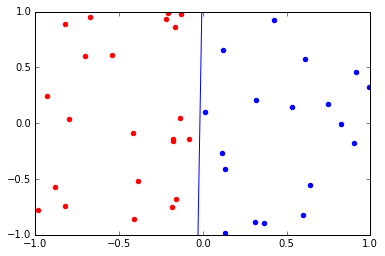

In [137]:
N = 40 # number of training examples

# initialize target function
L = Line.random()

# initialize N random points
training_examples = [Point.random() for _ in range(N)]
X0 = [training_examples[_].x for _ in range(N) if L.evaluatePoint(training_examples[_]) == 1]
Y0 = [training_examples[_].y for _ in range(N) if L.evaluatePoint(training_examples[_]) == 1]
X1 = [training_examples[_].x for _ in range(N) if L.evaluatePoint(training_examples[_]) == -1]
Y1 = [training_examples[_].y for _ in range(N) if L.evaluatePoint(training_examples[_]) == -1]

# visualize the training examples
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.scatter(X0, Y0, color="r")
plt.scatter(X1, Y1, color="b")
plt.plot((-1, 1), (L.getPointAtX(-1).y, L.getPointAtX(1).y))
plt.show()

In [139]:
# initialize perceptron
perceptron = Perceptron(2)

misclassified = [point for point in training_examples if perceptron.classify(point) != L.evaluatePoint(point)]
while misclassified:
    point = random.choice(misclassified)
    perceptron.learn(point, L.evaluatePoint(point))
    misclassified = [point for point in training_examples if perceptron.classify(point) != L.evaluatePoint(point)]
#     print(len(misclassified))

print(perceptron.weights)
G = Line(perceptron.weights[1], perceptron.weights[2], perceptron.weights[0])

[0, -2.699086092148252, 0.03623002778419693]


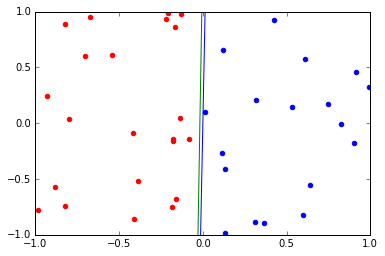

In [140]:
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.scatter(X0, Y0, color="r")
plt.scatter(X1, Y1, color="b")
plt.plot((-1, 1), (L.getPointAtX(-1).y, L.getPointAtX(1).y), color="g")
plt.plot((-1, 1), (G.getPointAtX(-1).y, G.getPointAtX(1).y), color="b")
plt.show()

In [117]:
print(perceptron.weights)
print([1] + training_examples[0].asVector())
print(perceptron.classify(training_examples[0]))
print(sum(w*t for (w, t) in zip(perceptron.weights, [1] + training_examples[0].asVector())))

[0, -0.6894222842574336, 0.6715438557937734]
[1, 0.12913136859793473, 0.13959751884250116]
1
0.004719812954660382
